In [12]:
# Sets project folder as working directory ('.../My Drive/Colab Notebooks/cifar10_classification_autoencoder)
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab \Notebooks/cifar10_classification_autoencoder
!pwd
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder/cifar10_modules/')
!pip install matplotlib==3.1.0

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder


In [2]:
# Developed modules
from dataset import *
from modelling4 import *

Using TensorFlow backend.


In [0]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [0]:
set_random_seeds(42)

In [0]:
classifier_config= {'batch_size': 32,
                    'callbacks': False,
                    'data_augmentation': False,
                    'balance_classes_onepoch': False,
                    'batch_norm': False,
                    'dense': True,
                    'dropout': False,
                    'dropout_value': 0.2,
                    'early_stopping': False,
                    'early_stopping_delta': 0.1,
                    'early_stopping_patience': 10,
                    'epochs': 100,
                    'global_pooling': 'max',
                    'image_shape': [32, 32, 3],
                    'loss': 'categorical_crossentropy',
                    'lr': 0.001,
                    'optimizer': 'adam',
                    'class_weights': False,
                    'weighted_metrics': None}

In [0]:
save_config(classifier_config,'classifier_config_base.json')

In [7]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names= load_and_norm(0.22)

Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3910
automobile : 3891
bird : 1944
cat : 3874
deer : 1981
dog : 3913
frog : 3894
horse : 3889
ship : 3905
truck : 1949

**Validation data**
Number of samples: 9350
airplane : 1090
automobile : 1109
bird : 556
cat : 1126
deer : 519
dog : 1087
frog : 1106
horse : 1111
ship : 1095
truck : 551

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0   

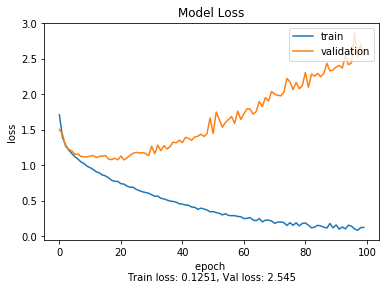

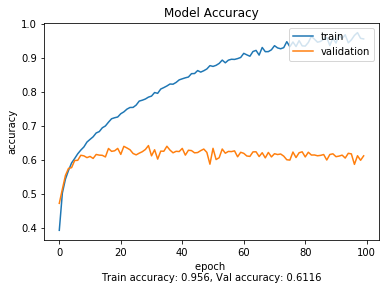

In [0]:
#1
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
encoder_filename= 'encoder_4m_adam_50epochs_3blocks'
classifier_filename= 'classifier_4m_adam_50epochs_3blocks'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

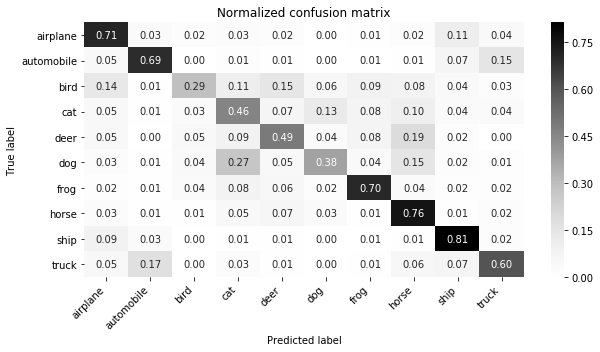


              precision    recall  f1-score   support

    airplane       0.65      0.71      0.68      1090
  automobile       0.77      0.69      0.73      1109
        bird       0.47      0.29      0.36       556
         cat       0.45      0.46      0.46      1126
        deer       0.39      0.49      0.43       519
         dog       0.61      0.38      0.46      1087
        frog       0.74      0.70      0.72      1106
       horse       0.61      0.76      0.67      1111
        ship       0.71      0.81      0.76      1095
       truck       0.49      0.60      0.54       551

    accuracy                           0.61      9350
   macro avg       0.59      0.59      0.58      9350
weighted avg       0.61      0.61      0.61      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0   

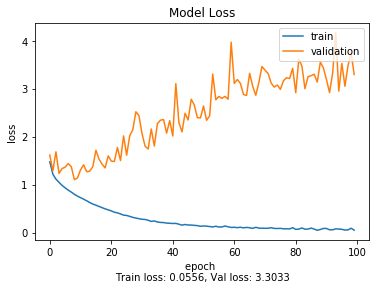

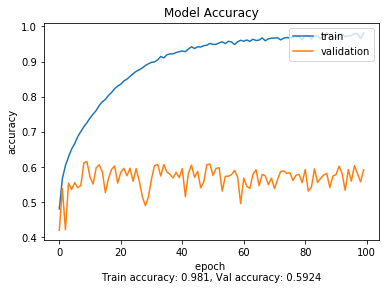

In [0]:
#1 with batch norm
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks'
classifier_filename= 'classifier_4_batch_norm_adam_50epochs_3blocks'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0 

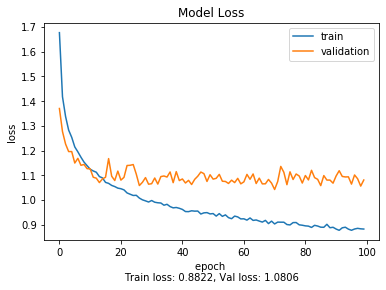

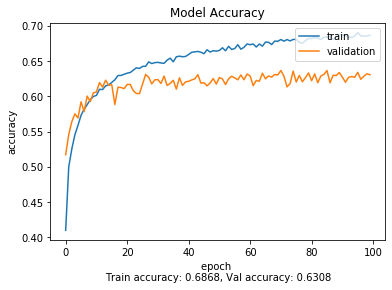

In [0]:
#4
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'

classifier_filename= 'classifier_4_batch_norm_adam_50epochs_3blocks_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

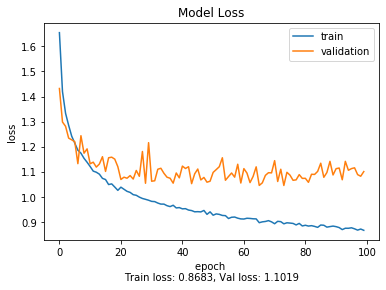

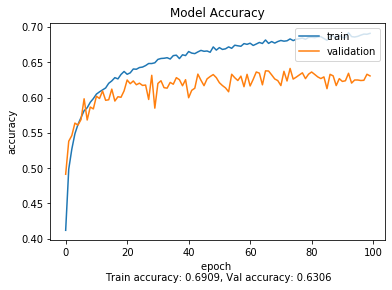

In [8]:
#4 with batch_norm in all layers
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'

classifier_filename= 'classifier_4_batch_norm_all_adam_50epochs_3blocks_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

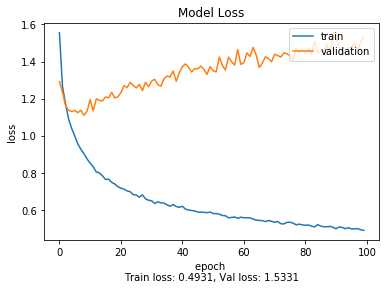

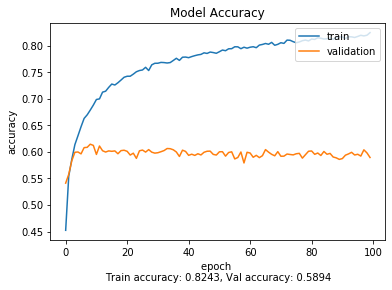

In [8]:
#5
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_02dropout'

classifier_filename= 'classifier_4m_adam_50epochs_3blocks_batch_norm_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0   

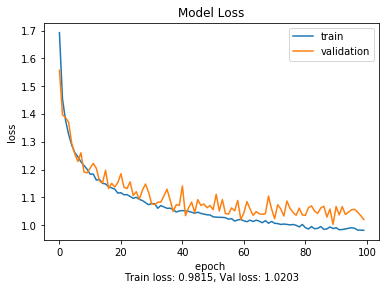

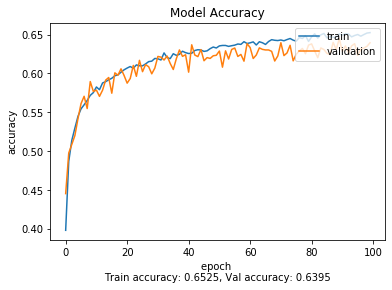

In [9]:
#4 with batch_norm in all layers and dropout 
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['dropout']= True
classifier_config['dropout_value']= 0.2
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'

classifier_filename= 'classifier_4_batch_norm_all_adam_50epochs_3blocks_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0   

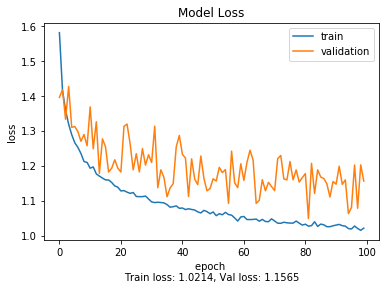

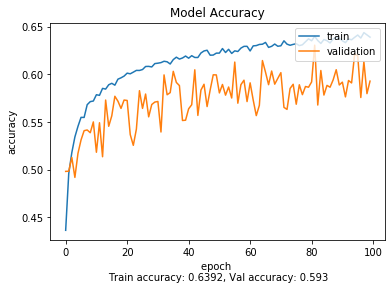

In [11]:
#4 with batch_norm in all layers and dropout and rmsprop
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['dropout']= True
classifier_config['dropout_value']= 0.2
classifier_config['optimizer'] = 'rmsprop'
classifier_config['lr'] = 0.01
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_batch_norm_05dropout'

classifier_filename= 'classifier_4_batch_norm_all_rmsprop_adam_50epochs_3blocks_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)       7385

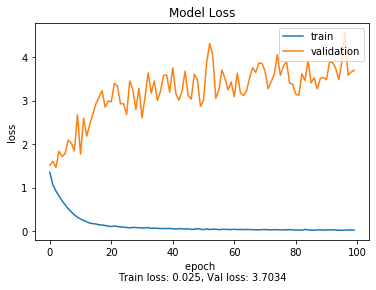

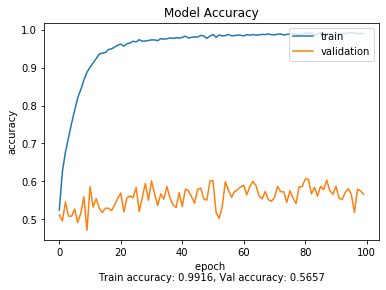

In [23]:
#6 
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm'
classifier_filename= 'classifier_4m_adam_50epochs_3blocks_64init_batch_norm'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_57 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 128)       7385

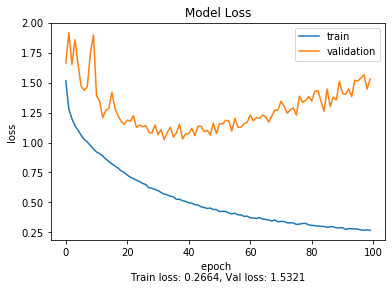

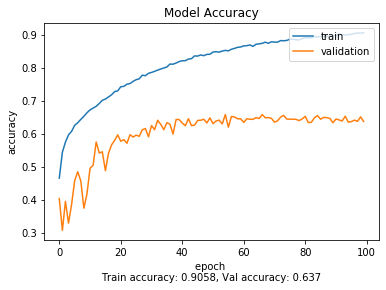

In [43]:
#6  with dropout 
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['dropout'] = True
classifier_config['dropout_value'] = 0.5
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm'
classifier_filename= 'classifier_4m_05dropout_adam_50epochs_3blocks_64init_batch_norm'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0   

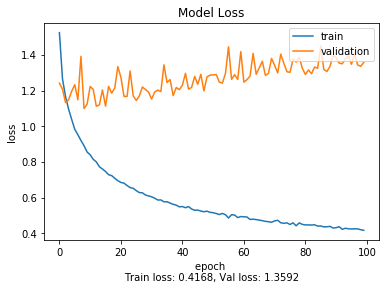

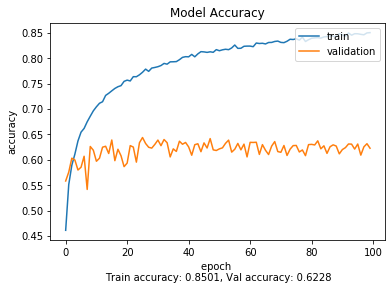

In [41]:
#7
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['dropout_value'] = 0.5
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout'
classifier_filename= 'classifier_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

In [11]:
#7 with flatten layer
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm_05dropout'
classifier_filename= 'classifier_4m_flatten_adam_50epochs_3blocks_64init_batch_norm_05dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0   

ValueError: ignored

In [10]:
#8
autoencoder_config=load_config('autoencoder_config_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr']= 0.001
classifier_config['batch_norm']= True
encoder_filename= 'encoder_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input'
classifier_filename= 'classifier_4m_adam_50epochs_3blocks_64init_batch_norm_02gaussian_noise_input'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       7385

KeyboardInterrupt: ignored